### Thinking1
如何使用用户标签来指导业务（如何提升业务）

答：对于用户生命周期的三个阶段：  
&emsp;&emsp;在获客阶段：使用用户标签可以让我们采取更精确、更有针对性的营销手段进行拉新；  
&emsp;&emsp;在粘客阶段：使用用户标签可以对用户进行个性化的推荐，进行场景营销，使用户获得更好的使用体验，从而增加用户的使用时长、频次；  
&emsp;&emsp;在留客阶段：使用用户标签可以进行流失率的预测，使得我们可以更好地分析容易流失的用户群体的特征，找出相应的对策，降低流失率。

### Thinking2
如果给你一堆用户数据，没有打标签。你该如何处理（如何打标签）

答：可以从用户、消费、行为、内容这四个维度来对用户打标签，其中：  
&emsp;&emsp;用户标签可以有：性别、年龄、地域、职业、学历、收入等；  
&emsp;&emsp;消费标签可以有：消费习惯（比如消费时间是否有规律，单笔消费金额的多少，是否喜欢货比三家等）、购买意向、是否对促销敏感等；  
&emsp;&emsp;行为标签可以有：显性行为（点赞、收藏、打赏、分享、关注、评分等）、隐形行为（点击、浏览的时长、频次）；  
&emsp;&emsp;内容标签即通过对用户平时浏览的内容进行分析得到的标签，如美食、娱乐、体育等。

### Thinking3
准确率和精确率有何不同（评估指标）

答：准确率是指预测正确的次数占总预测次数的比例，精确率是指在所有预测为正（positive）的预测中，预测正确的结果所占的比例。在一些样本分布不均的情况下，可能出现因为大部分样本为负（negative），TN（true negative)可能很大，从而使得准确率很高的情况，此时如果目标是提高预测为正的的准确率，就需要加上精确率指标来进行评估。

### Thinking4
如果你使用大众点评，想要给某个餐厅打标签。这时系统可以自动提示一些标签，你会如何设计（标签推荐）


答：可以综合该餐厅所属类的热门标签（比如川菜馆常出现的“麻辣”），该餐厅所被打过标签中常出现的标签（如“毛血旺特色”），以及该用户常使用的标签（比如“价格合理”）来向用户推荐一些标签。

### Thinking5
我们今天使用了10种方式来解MNIST，这些方法有何不同？你还有其他方法来解决MNIST识别问题么（分类方法）

#### (1) 逻辑回归  
&emsp;&emsp;设定一在(0,1)区间内的阈值，将sigmoid函数作用在线性函数 $\theta^Tx$ 上(其中$\theta$为模型训练得到的参数），如果得到的结果大于阈值，则预测为1，反正则预测为0。
#### (2) 决策树 
&emsp;&emsp;每个节点根据gini值或信息熵选择最优的分类特征进行分类，形成树结构，即一个节点表示一个属性上的判断，一个分支代表一个判定结果的输出，一个叶子节点表示一个分类结果。 
#### (3) LDA
&emsp;&emsp;将数据在低维空间进行投影，使得同一类别数据投影点尽可能靠近，不同类别数据投影点间距离尽可能的大。
#### (4) 朴素贝叶斯
&emsp;&emsp;根据独立性假设和贝叶斯公式，计算样本属于不同类别的概率，以概率大者为最终的输出结果。 
#### (5) SVM
&emsp;&emsp;寻找超平面将样本分成两类，且使得两类样本间隔最大。
#### (6) KNN
&emsp;&emsp;计算每个样本点与其他样本点的距离，找到离它最近的k个样本点，以其中的多数类别作为该样本的类别。
#### (7) Adaboost
&emsp;&emsp;Adaboost:在boosting的过程中，增大被前一个基本分类器分错的样本的权重，再利用调整权重后的样本集训练下一个分类器，训练结束后，增大分类出错率小的弱分类器在分类函数中的权重。
#### (8) XGboost
&emsp;&emsp;以回归树作为基本分类器，每棵树都用一个新的函数去拟合上一颗树预测的残差，训练完成后，对于一个样本，根据其特征，在每一颗树上都会对应落到一个叶子节点上，将这些叶子节点的值相加，得到最终的预测值。
#### (9) TPOP
&emsp;&emsp;自动机器学习工具，可以自动实现特征选择、特征预处理、特征构建，并进行模型选择和参数调优。
#### (10) keras
&emsp;&emsp;由Python编写的开源神经网络库。  

&emsp;&emsp;除此之外，还可以使用随机森林、ANN（人工神经网络）等算法。

### Action1
针对Delicious数据集，对SimpleTagBased算法进行改进（使用NormTagBased、TagBased-TFIDF算法）

In [1]:
# 使用SimpleTagBased算法对Delicious2K数据进行推荐
# 原始数据集：https://grouplens.org/datasets/hetrec-2011/
# 数据格式：userID     bookmarkID     tagID     timestamp
import random
import math
import operator
import pandas as pd

file_path = "./user_taggedbookmarks-timestamps.dat"

# 数据探索
df = pd.read_csv(file_path, sep='\t')
df.head()

,userID,bookmarkID,tagID,timestamp
0,8,1,1,1289255362000
1,8,2,1,1289255159000
2,8,7,1,1289238901000
3,8,7,6,1289238901000
4,8,7,7,1289238901000


In [7]:
# 字典类型，保存了user对item的tag，即{userid: {item1:[tag1, tag2], ...}}
records = {}
# 训练集，测试集
train_data = dict()
test_data = dict()
# 用户标签，商品标签
user_tags = dict()
user_items = dict()
tag_users = dict()
tag_items = dict()
# 数据加载

def load_data():
    print("开始数据加载...")
    df = pd.read_csv(file_path, sep='\t')
    for i in range(len(df)):
        uid = df['userID'][i]
        iid = df['bookmarkID'][i]
        tag = df['tagID'][i]
        # 键不存在时，设置默认值{}
        records.setdefault(uid,{})
        records[uid].setdefault(iid,[])
        records[uid][iid].append(tag)
    print("数据集大小为 %d." % (len(df)))
    print("设置tag的人数 %d." % (len(records)))
    print("数据加载完成\n")

In [8]:
load_data()

开始数据加载...
数据集大小为 437593.
设置tag的人数 1867.
数据加载完成



In [9]:
list(records.items())[0]

(8,
 {1: [1],
  2: [1],
  7: [1, 6, 7],
  8: [1, 8, 9],
  9: [1, 10],
  10: [1, 11],
  11: [1, 12, 13],
  14: [1, 15, 16, 17, 18],
  15: [1, 19],
  16: [1, 5],
  17: [1, 20],
  18: [1, 21],
  19: [1, 22],
  20: [1, 23],
  22: [1, 10, 25],
  24: [1, 27],
  25: [1, 28],
  26: [1, 29],
  27: [1, 30],
  30: [1, 33],
  32: [1, 35],
  33: [1, 36],
  34: [1, 37],
  35: [1, 38],
  36: [1, 39],
  37: [1, 40],
  38: [1, 41],
  41: [43],
  42: [43],
  43: [44],
  44: [45],
  45: [46],
  46: [47],
  48: [49, 50, 51, 52],
  52: [57],
  53: [51, 58, 59, 60, 61],
  58: [2, 66],
  59: [56],
  60: [2, 67],
  61: [1, 68],
  62: [69],
  63: [70],
  64: [71],
  65: [71],
  68: [45, 76, 77],
  71: [44],
  72: [45, 79],
  73: [24, 56, 80],
  74: [24, 81, 82, 83],
  75: [45, 76, 84],
  76: [45, 76],
  78: [45, 76, 86, 87],
  79: [45, 88, 89, 90, 91, 92, 93],
  80: [45, 88, 94, 95],
  81: [96, 97],
  82: [68, 98, 99, 100],
  83: [2, 101, 102],
  84: [2, 103],
  85: [104, 105],
  87: [2, 25, 82, 108],
  88: [2

In [13]:
# 将数据集拆分为训练集和测试集
def train_test_split(ratio, seed=100):
    random.seed(seed)
    for u in records.keys():
        for i in records[u].keys():
            # ratio比例设置为测试集
            if random.random()<ratio:
                test_data.setdefault(u,{})
                test_data[u].setdefault(i,[])
                for t in records[u][i]:
                    test_data[u][i].append(t)
            else:
                train_data.setdefault(u,{})
                train_data[u].setdefault(i,[])
                for t in records[u][i]:
                    train_data[u][i].append(t)        
    print("训练集样本数 %d, 测试集样本数 %d" % (len(train_data),len(test_data)))

In [56]:
# train_data = dict()
# test_data = dict()
train_test_split(0.2)

训练集样本数 1867, 测试集样本数 1793


In [57]:
# 计数函数
def addValueToMat(mat, index, item, value=1):
    if index not in mat:
        mat.setdefault(index,{})
        mat[index].setdefault(item,value)
    else:
        if item not in mat[index]:
            mat[index][item] = value
        else:
            mat[index][item] += value


# 使用训练集，初始化user_tags, tag_items, user_items
def initStat():
    records=train_data
    for u,items in records.items():
        for i,tags in items.items():
            for tag in tags:
                # 用户和tag的关系
                addValueToMat(user_tags, u, tag, 1)
                # 用户和item的关系
                addValueToMat(user_items, u, i, 1)
                # tag和item的关系
                addValueToMat(tag_items, tag, i, 1)
                # tag和用户的关系
                addValueToMat(tag_users, tag, u, 1)
    print("user_tags, user_items, tag_items, tag_users初始化完成.")
    print("user_tags大小 %d,  user_items大小 %d, tag_items大小 %d, tag_users大小 %d" % \
          (len(user_tags), len(user_items), len(tag_items), len(tag_users)))

In [58]:
initStat()

user_tags, user_items, tag_items, tag_users初始化完成.
user_tags大小 1867,  user_items大小 1867, tag_items大小 40726, tag_users大小 40726


In [59]:
user_tags[8]

{1: 79,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 6,
 11: 3,
 12: 3,
 13: 3,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 2,
 5: 3,
 20: 2,
 21: 3,
 22: 3,
 23: 3,
 25: 12,
 27: 3,
 28: 3,
 29: 2,
 30: 2,
 33: 3,
 35: 3,
 36: 3,
 37: 3,
 38: 3,
 39: 3,
 40: 3,
 41: 3,
 43: 5,
 44: 5,
 46: 3,
 47: 3,
 49: 3,
 50: 3,
 51: 6,
 52: 3,
 57: 2,
 58: 3,
 59: 3,
 60: 3,
 61: 3,
 2: 21,
 66: 9,
 56: 6,
 67: 3,
 68: 6,
 69: 3,
 70: 2,
 71: 6,
 45: 21,
 76: 12,
 77: 3,
 79: 3,
 24: 18,
 80: 3,
 81: 3,
 82: 12,
 83: 3,
 84: 3,
 86: 3,
 87: 3,
 88: 6,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 3,
 99: 3,
 100: 3,
 101: 3,
 102: 3,
 103: 3,
 104: 3,
 105: 3,
 108: 3,
 106: 3,
 109: 3,
 111: 2,
 112: 3,
 113: 3}

In [60]:
# 对用户user推荐Top-N
def recommend(user, N, method='SimpleTagBased'):
    # 对Item进行打分，分数为所有的（用户对某标签使用的次数 wut, 乘以商品被打上该标签的次数 wti）     
    tagged_items = user_items[user]
    if method == 'SimpleTagBased':
        recommend_items=dict()
        for tag, wut in user_tags[user].items():
            for item, wti in tag_items[tag].items():
                if item in tagged_items:
                    continue
                if item not in recommend_items:
                    recommend_items[item] = wut * wti
                else:
                    recommend_items[item] = recommend_items[item] + wut * wti
        return sorted(recommend_items.items(), key=operator.itemgetter(1), reverse=True)[0:N]
    
    if method == 'NormTagBased':
        recommend_items=dict()
        sum_wui = 0
        for i in user_tags[user].values():
            sum_wui += i
        for tag, wut in user_tags[user].items():
            sum_wut = 0
            for i in tag_items[tag]:
                sum_wut += i
            for item, wti in tag_items[tag].items():
                if item in tagged_items:
                    continue
                if item not in recommend_items:
                    recommend_items[item] = (wut/sum_wui) * (wti/sum_wut)
                else:
                    recommend_items[item] = recommend_items[item] + (wut/sum_wui) * (wti/sum_wut)
        return sorted(recommend_items.items(), key=operator.itemgetter(1), reverse=True)[0:N]
    
    if method == 'TagBased-TFIDF':
        recommend_items=dict()
        for tag, wut in user_tags[user].items():
            for item, wti in tag_items[tag].items():
                if item in tagged_items:
                    continue
                if item not in recommend_items:
                    recommend_items[item] = (wut/math.log(1+len(tag_users[tag])))* wti
                else:
                    recommend_items[item] = recommend_items[item] + (wut/math.log(1+len(tag_users[tag])))* wti
        return sorted(recommend_items.items(), key=operator.itemgetter(1), reverse=True)[0:N]

In [61]:
temp = recommend(8,5)
temp

[(1526, 680), (1416, 609), (4639, 474), (23964, 474), (4535, 453)]

In [62]:
temp = recommend(8,5,method='NormTagBased')
temp

[(1855, 3.1427675490393956e-06),
 (4565, 3.1427675490393956e-06),
 (14937, 1.3600955814725966e-06),
 (21257, 6.721838677721262e-07),
 (66188, 6.280056999143758e-07)]

In [63]:
temp = recommend(8,5,method='TagBased-TFIDF')
temp

[(1526, 142.48931384045886),
 (1416, 121.04926685671883),
 (4639, 99.0080036617578),
 (23964, 99.0080036617578),
 (6656, 86.24063132089113)]

In [66]:
# 使用测试集，计算准确率和召回率
def precisionAndRecall(N, method):
    hit = 0
    h_recall = 0
    h_precision = 0
    for user,items in test_data.items():
        if user not in train_data:
            continue
        # 获取Top-N推荐列表
        rank = recommend(user, N, method)
        for item,rui in rank:
            if item in items:
                hit = hit + 1
        h_recall = h_recall + len(items)
        h_precision = h_precision + len(rank)
    return (hit/(h_precision*1.0)), (hit/(h_recall*1.0))

# 使用测试集，对推荐结果进行评估
def testRecommend(method):
    print("%s方法推荐结果评估" % method)
    print("%3s %10s %10s" % ('N',"精确率",'召回率'))
    for n in [5,10,20,40,60,80,100]:
        precision,recall = precisionAndRecall(n,method)
        print("%3d %10.3f%% %10.3f%%" % (n, precision * 100, recall * 100))

In [67]:
testRecommend('SimpleTagBased')

SimpleTagBased方法推荐结果评估
  N        精确率        召回率
  5      0.034%      0.014%
 10      0.034%      0.029%
 20      0.028%      0.048%
 40      0.028%      0.096%
 60      0.022%      0.110%
 80      0.018%      0.125%
100      0.017%      0.149%


In [68]:
testRecommend('NormTagBased')

NormTagBased方法推荐结果评估
  N        精确率        召回率
  5      0.067%      0.029%
 10      0.045%      0.038%
 20      0.028%      0.048%
 40      0.025%      0.086%
 60      0.021%      0.105%
 80      0.018%      0.125%
100      0.016%      0.134%


In [69]:
testRecommend('TagBased-TFIDF')

TagBased-TFIDF方法推荐结果评估
  N        精确率        召回率
  5      0.067%      0.029%
 10      0.062%      0.053%
 20      0.036%      0.062%
 40      0.027%      0.091%
 60      0.022%      0.110%
 80      0.018%      0.120%
100      0.017%      0.144%


### Action2
对Titanic数据进行清洗，建模并对乘客生存进行预测。使用之前介绍过的10种模型中的至少2种（包括TPOT）

In [142]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 数据加载
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [143]:
# 数据探索
pd.set_option('display.max_columns', None) #显示所有列
# 查看train_data信息
print('查看数据信息：列名、非空个数、类型等')
print(train_data.info())
print('-'*30)
print('查看数据统计信息')
print(train_data.describe())
print('-'*30)
print('查看离散数据分布')
print(train_data.describe(include=['O']))
print('-'*30)
print('查看前5条数据')
train_data.head()

查看数据信息：列名、非空个数、类型等
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------
查看数据统计信息
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.3086

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [144]:
# 查看test_data信息
print('查看数据信息：列名、非空个数、类型等')
print(test_data.info())
print('-'*30)
print('查看数据统计信息')
print(test_data.describe())
print('-'*30)
print('查看离散数据分布')
print(test_data.describe(include=['O']))
print('-'*30)
print('查看前5条数据')
test_data.head()

查看数据信息：列名、非空个数、类型等
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
------------------------------
查看数据统计信息
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.3923

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


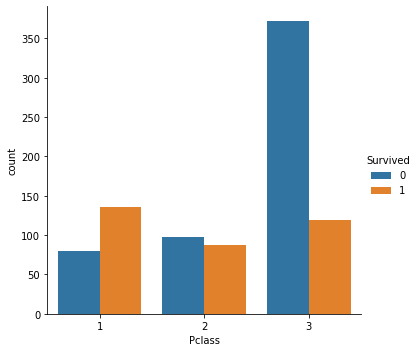

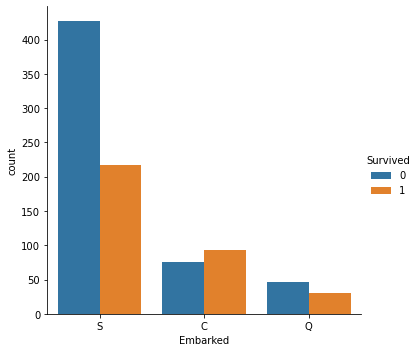

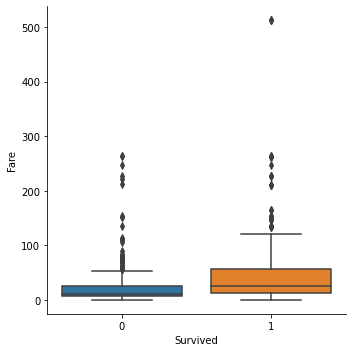

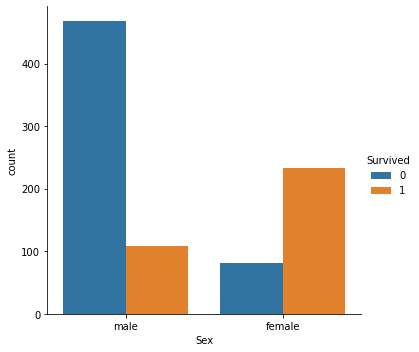

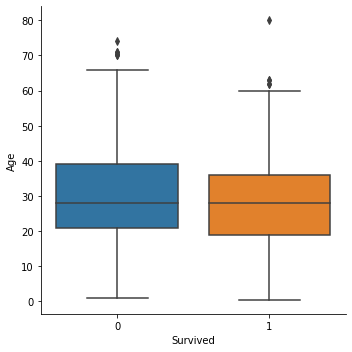

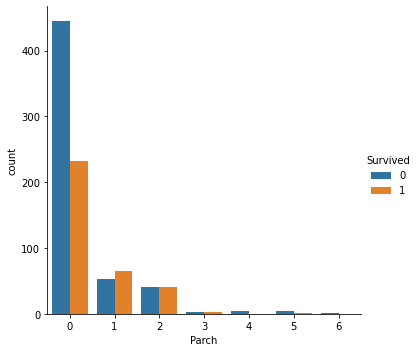

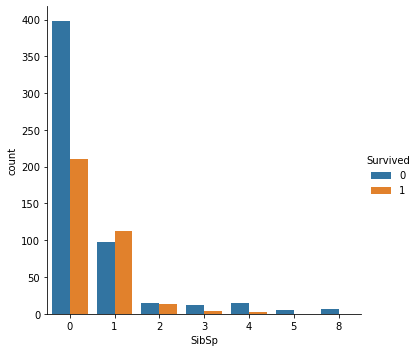

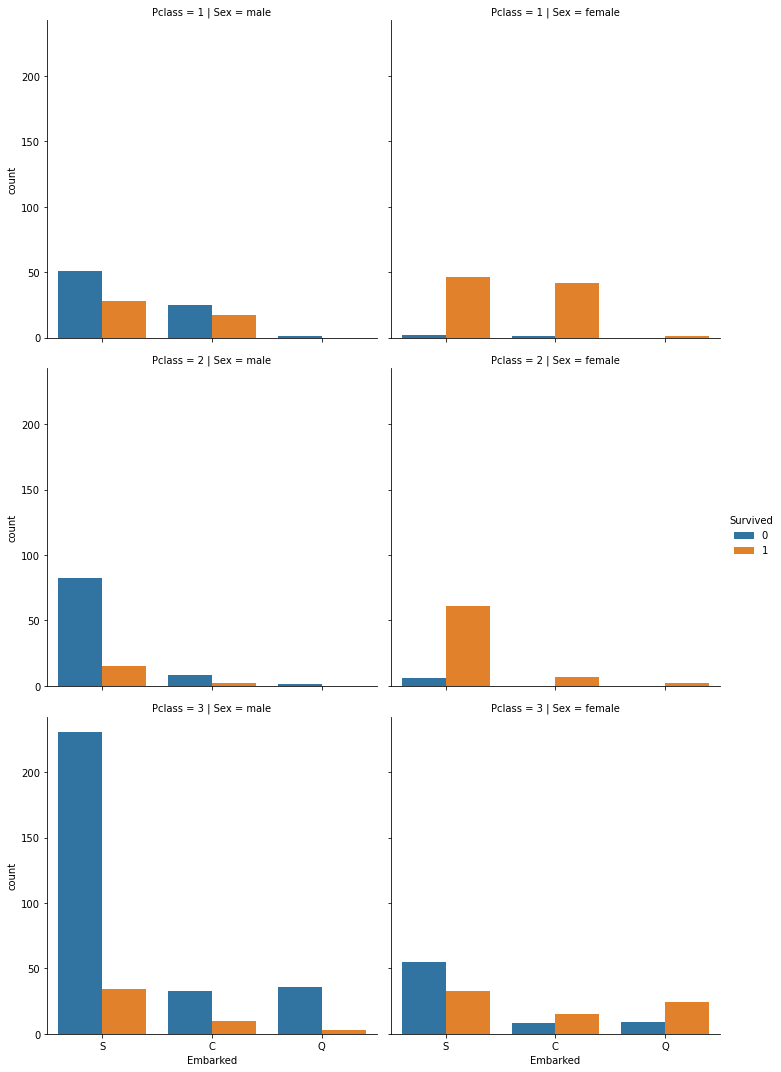

In [145]:
# 直观展示
import seaborn as sns
sns.catplot('Pclass', hue='Survived', kind='count', data=train_data)
sns.catplot('Embarked', hue='Survived', kind='count', data=train_data)
sns.catplot(x='Survived',y='Fare', kind='box', data=train_data)
sns.catplot('Sex', hue='Survived', kind='count', data=train_data)
sns.catplot(x='Survived',y='Age', kind='box', data=train_data)
sns.catplot('Parch', hue='Survived', kind='count', data=train_data)
sns.catplot('SibSp', hue='Survived', kind='count', data=train_data)
sns.catplot('Embarked', hue='Survived', row='Pclass', col='Sex', kind='count', data=train_data)

In [146]:
# 缺失值处理

# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
# 使用票价的均值填充票价中的nan值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

print(train_data['Embarked'].value_counts())
# 使用登录最多的港口来填充登录港口的nan值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [149]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]
print('特征值')
print(train_features)
dvec=DictVectorizer(sparse=False) # sparse=False意思是不产生稀疏矩阵
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
test_features=dvec.fit_transform(test_features.to_dict(orient='record'))

print(dvec.feature_names_)
pd.DataFrame(train_features).head()

特征值
     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]
['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


,0,1,2,3,4,5,6,7,8,9
0,22.0,0.0,0.0,1.0,7.2500,0.0,3.0,0.0,1.0,1.0
1,38.0,1.0,0.0,0.0,71.2833,0.0,1.0,1.0,0.0,1.0
2,26.0,0.0,0.0,1.0,7.9250,0.0,3.0,1.0,0.0,0.0
3,35.0,0.0,0.0,1.0,53.1000,0.0,1.0,1.0,0.0,1.0
4,35.0,0.0,0.0,1.0,8.0500,0.0,3.0,0.0,1.0,0.0


In [209]:
# 由于test_data没有Survived字段信息，为能检验模型效果，暂用train_data作为训练集来进行train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.25, random_state=3)

# ID3决策树
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

print('对于决策树：')
y_predict = clf.predict(X_test)
print('score准确率为 %.4lf' % accuracy_score(y_predict, y_test))

# 使用K折交叉验证 统计决策树准确率
print('cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

对于决策树：
score准确率为 0.7848
cross_val_score准确率为 0.7745


In [222]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=5, max_samples=0.5, random_state=3)
clf.fit(X_train, y_train)

print('对于随机森林：')
y_predict = clf.predict(X_test)
print('score准确率为 %.4lf' % accuracy_score(y_predict, y_test))

# 使用K折交叉验证 统计决策树准确率
print('cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

对于随机森林：
score准确率为 0.8117
cross_val_score准确率为 0.8328


In [223]:
# SVM
from sklearn.svm import LinearSVC
clf = LinearSVC(dual=False)
clf.fit(X_train, y_train)

print('对于SVM：')
y_predict = clf.predict(X_test)
print('score准确率为 %.4lf' % accuracy_score(y_predict, y_test))

# 使用K折交叉验证 统计决策树准确率
print('cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

对于SVM：
score准确率为 0.7803
cross_val_score准确率为 0.7924


In [224]:
# TPOT
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_Titanic.py')


Generation 1 - Current best internal CV score: 0.8263494557288744
Generation 2 - Current best internal CV score: 0.8337896981259117
Generation 3 - Current best internal CV score: 0.8337896981259117
Generation 4 - Current best internal CV score: 0.8367747727527775
Generation 5 - Current best internal CV score: 0.8367747727527775
Best pipeline: GaussianNB(ZeroCount(RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=6, n_estimators=100)))
0.8026905829596412
